<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/1297rohit/RCNN/master/Images.zip

--2021-04-20 14:30:20--  https://raw.githubusercontent.com/1297rohit/RCNN/master/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12680736 (12M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>]  12.09M  32.8MB/s    in 0.4s    

2021-04-20 14:30:21 (32.8 MB/s) - ‘Images.zip’ saved [12680736/12680736]



In [2]:
!wget https://raw.githubusercontent.com/1297rohit/RCNN/master/Airplanes_Annotations.zip

--2021-04-20 14:30:30--  https://raw.githubusercontent.com/1297rohit/RCNN/master/Airplanes_Annotations.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181072 (177K) [application/zip]
Saving to: ‘Airplanes_Annotations.zip’

Airplanes_Annotatio 100%[===================>] 176.83K  --.-KB/s    in 0.03s   

2021-04-20 14:30:30 (6.12 MB/s) - ‘Airplanes_Annotations.zip’ saved [181072/181072]



In [3]:
!unzip Images.zip

Archive:  Images.zip
   creating: Images/
  inflating: Images/airplane_007.jpg  
  inflating: Images/airplane_006.jpg  
  inflating: Images/airplane_005.jpg  
  inflating: Images/airplane_004.jpg  
  inflating: Images/airplane_003.jpg  
  inflating: Images/airplane_002.jpg  
  inflating: Images/airplane_001.jpg  
  inflating: Images/428503.jpg       
  inflating: Images/428501.jpg       
  inflating: Images/428492.jpg       
  inflating: Images/428491.jpg       
  inflating: Images/428483.jpg       
  inflating: Images/428482.jpg       
  inflating: Images/428481.jpg       
  inflating: Images/428472.jpg       
  inflating: Images/428462.jpg       
  inflating: Images/428461.jpg       
  inflating: Images/428452.jpg       
  inflating: Images/428451.jpg       
  inflating: Images/42850.jpg        
  inflating: Images/42849.jpg        
  inflating: Images/42848.jpg        
  inflating: Images/42847.jpg        
  inflating: Images/airplane_309.jpg  
  inflating: Images/airplane_319.jpg  

In [4]:
!unzip Airplanes_Annotations.zip

Archive:  Airplanes_Annotations.zip
   creating: Airplanes_Annotations/
 extracting: Airplanes_Annotations/airplane_095.csv  
  inflating: Airplanes_Annotations/airplane_094.csv  
  inflating: Airplanes_Annotations/airplane_093.csv  
  inflating: Airplanes_Annotations/airplane_092.csv  
  inflating: Airplanes_Annotations/airplane_091.csv  
  inflating: Airplanes_Annotations/airplane_090.csv  
 extracting: Airplanes_Annotations/airplane_089.csv  
 extracting: Airplanes_Annotations/airplane_088.csv  
 extracting: Airplanes_Annotations/airplane_087.csv  
 extracting: Airplanes_Annotations/airplane_086.csv  
  inflating: Airplanes_Annotations/airplane_085.csv  
 extracting: Airplanes_Annotations/airplane_084.csv  
  inflating: Airplanes_Annotations/airplane_083.csv  
  inflating: Airplanes_Annotations/airplane_082.csv  
 extracting: Airplanes_Annotations/airplane_081.csv  
 extracting: Airplanes_Annotations/airplane_080.csv  
 extracting: Airplanes_Annotations/airplane_079.csv  
  inflatin

In [5]:
!cat /content/Airplanes_Annotations/42845.csv

4
15 69 40 96
10 173 42 203
74 212 100 243
233 197 256 226


In [6]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib import pyplot

In [7]:
path = "/content/Images"
annot = "/content/Airplanes_Annotations"

airplane_697.jpg


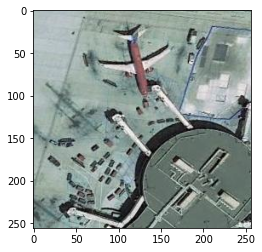

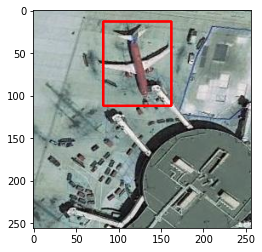

In [8]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [9]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

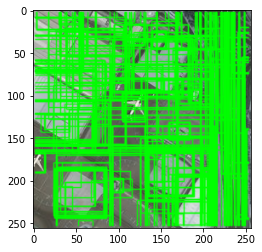

In [10]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [11]:
len(rects)

425

In [12]:
train_images=[]
train_labels=[]

In [13]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [14]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [15]:
len(os.listdir(annot))

733

In [16]:
len(os.listdir(annot)[0:100])

100

In [17]:
for e,i in enumerate(os.listdir(annot)[0:100]):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_697.jpg
1 airplane_124.jpg
2 airplane_529.jpg
3 airplane_067.jpg
4 airplane_198.jpg
5 airplane_616.jpg
inside
6 airplane_007.jpg
inside
7 airplane_625.jpg
8 airplane_003.jpg
9 airplane_247.jpg
10 airplane_457.jpg
11 airplane_207.jpg
12 airplane_190.jpg
inside
13 airplane_605.jpg
14 airplane_640.jpg
15 airplane_600.jpg
16 airplane_422.jpg
17 airplane_598.jpg
18 airplane_687.jpg
20 airplane_650.jpg
21 airplane_665.jpg
22 airplane_081.jpg
23 airplane_495.jpg
24 airplane_246.jpg
25 airplane_134.jpg
26 airplane_354.jpg
27 airplane_060.jpg
28 airplane_118.jpg
29 airplane_039.jpg
30 airplane_700.jpg
31 airplane_271.jpg
32 airplane_427.jpg
inside
33 airplane_695.jpg
34 airplane_448.jpg
35 airplane_191.jpg
36 airplane_553.jpg
inside
37 airplane_661.jpg
38 airplane_657.jpg
39 airplane_162.jpg
40 airplane_202.jpg
41 airplane_165.jpg
42 airplane_430.jpg
43 airplane_663.jpg
44 airplane_038.jpg
45 airplane_696.jpg
46 airplane_532.jpg
49 airplane_079.jpg
50 airplane_655.jpg
51 airplane_651

In [18]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [19]:
X_new.shape

(4018, 224, 224, 3)

In [20]:
X_new[0].shape

(224, 224, 3)

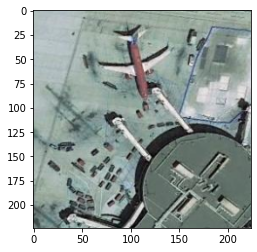

In [21]:
plt.imshow(X_new[1])

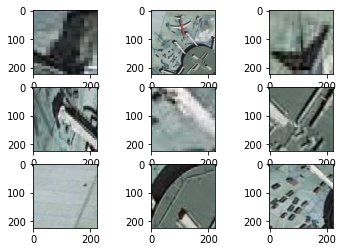

In [22]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_new[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [23]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [24]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467904/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [25]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [26]:
X= vggmodel.layers[-2].output

In [27]:
 print((vggmodel.layers)[-2])

In [28]:
X

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc2')>

In [29]:
predictions = Dense(2, activation="softmax")(X)

In [ ]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [ ]:
vggmodel.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
vggmodel.__dict__

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3616, 224, 224, 3) (402, 224, 224, 3) (3616, 2) (402, 2)


In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 10, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 5s 530ms/step - loss: 0.0548 - accuracy: 0.9812 - val_loss: 0.1474 - val_accuracy: 0.9375

Epoch 00001: val_loss did not improve from 0.02746
Epoch 2/10
10/10 [==============================] - 5s 536ms/step - loss: 0.1301 - accuracy: 0.9563 - val_loss: 0.1382 - val_accuracy: 0.9531

Epoch 00002: val_loss did not improve from 0.02746
Epoch 3/10
10/10 [==============================] - 5s 539ms/step - loss: 0.1532 - accuracy: 0.9250 - val_loss: 0.2054 - val_accuracy: 0.9219

Epoch 00003: val_loss did not improve from 0.02746
Epoch 4/10
10/10 [==============================] - 6s 563ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 0.1374 - val_accuracy: 0.9375

Epoch 00004: val_loss did not improve from 0.02746
Epoch 5/10
10/10 [==============================] - 5s 535ms/step - loss: 0.1449 - accuracy: 0.9500 - val_loss: 0.1586 - val_accuracy: 0.9688

Epoch 00005: val_loss did not improve from 0.02746
Epoch 6/10
10/10 [============

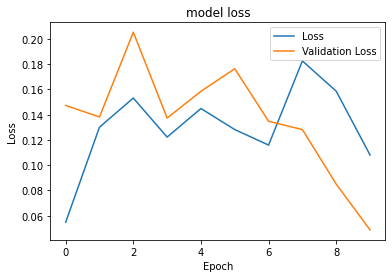

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [ ]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

IndexError: ignored

In [ ]:
os.listdir(path)[0]

'airplane_012.jpg'

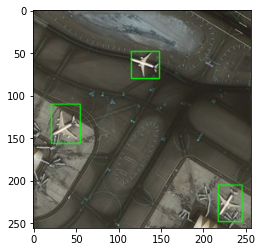

In [ ]:

img = cv2.imread("/content/Images/428472.jpg")
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.65:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)